# @Author : Ddnickk...

pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [28]:
df = pd.read_csv(r"E:\BDA-03\research work\energy_consumption_prediction-master\data\AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [29]:
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [30]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week

dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [31]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



C:\Users\Nakul\AppData\Local\Temp\ipykernel_7784\2080540361.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


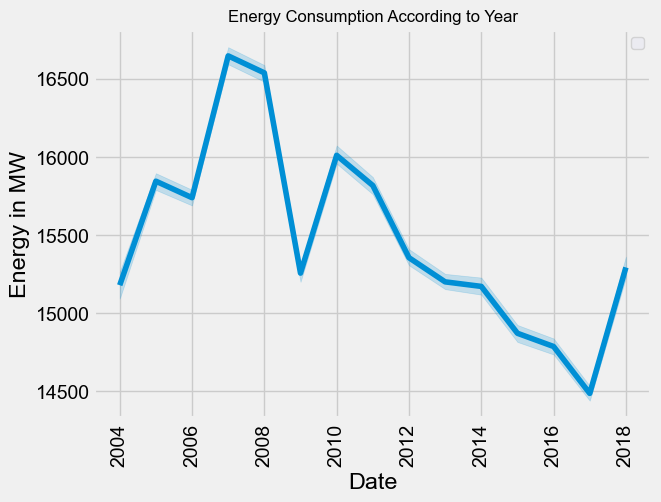

In [32]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(10,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

plt.savefig(r'E:\BDA-03\research work\plot2.png')

C:\Users\Nakul\AppData\Local\Temp\ipykernel_7784\2256989015.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


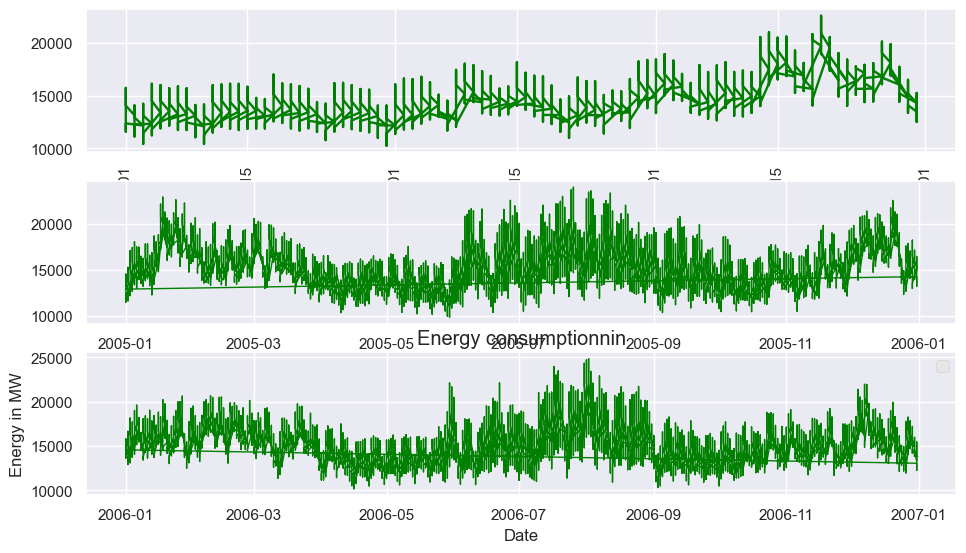

In [33]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

dataset['Date'] = pd.to_datetime(dataset['Date'])  # Ensure Date column is datetime
y_2004 = dataset[dataset['Date'].dt.year == 2004]["AEP_MW"].to_list()
x_2004 = dataset[dataset['Date'].dt.year == 2004]["Date"].to_list()

ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


# Ensure the Date column is in datetime format
#dataset['Date'] = pd.to_datetime(dataset['Date'])

# Filter data for 2005
y_2005 = dataset[dataset['Date'].dt.year == 2005]["AEP_MW"].to_list()
x_2005 = dataset[dataset['Date'].dt.year == 2005]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)

# Filter data for 2006
y_2006 = dataset[dataset['Date'].dt.year == 2006]["AEP_MW"].to_list()
x_2006 = dataset[dataset['Date'].dt.year == 2006]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)



plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

C:\Users\Nakul\AppData\Local\Temp\ipykernel_7784\2250681434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


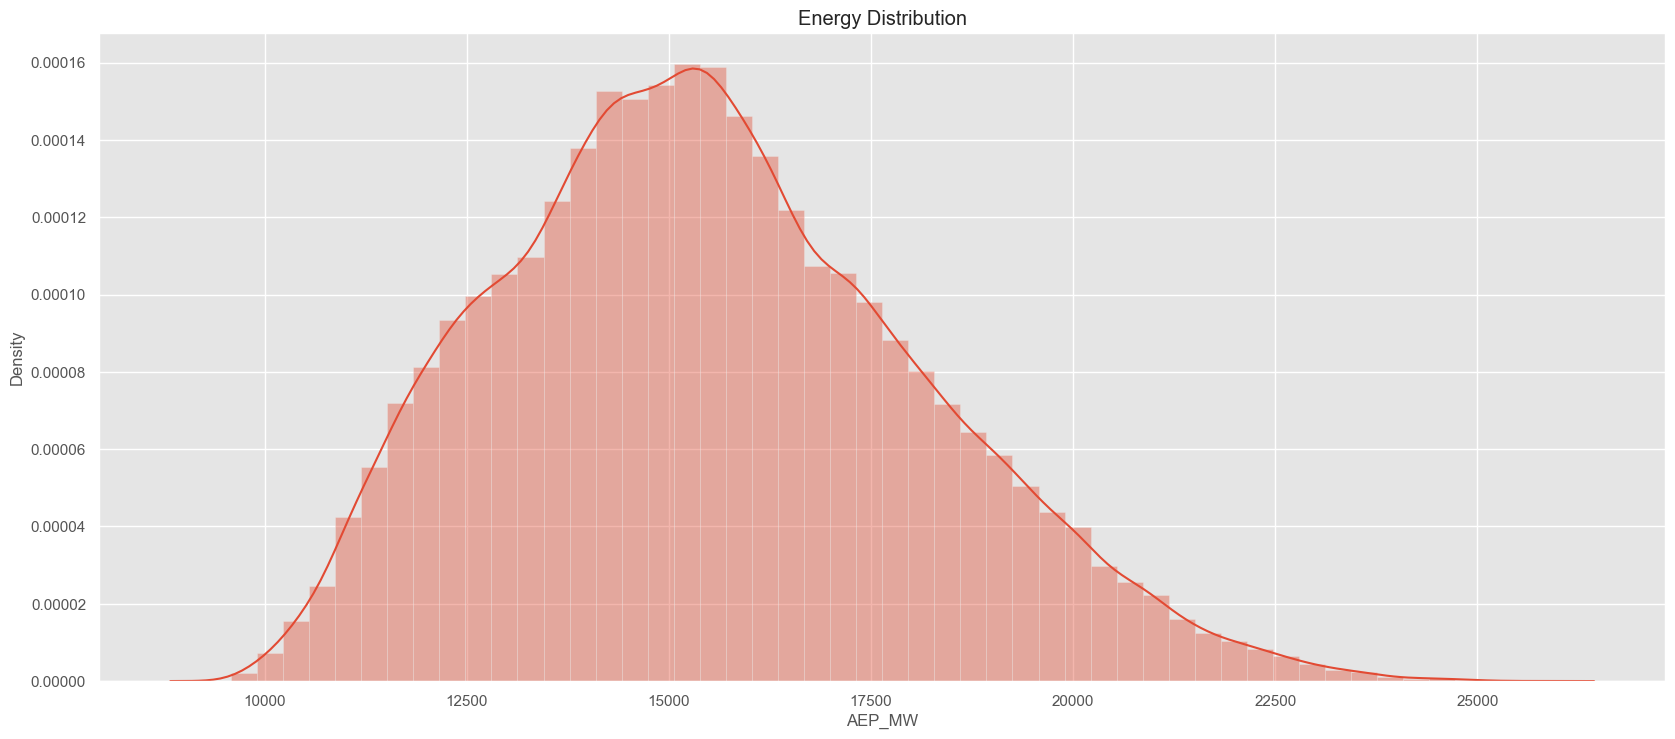

In [34]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

plt.savefig(r'E:\BDA-03\research work\plot3 energy distribution.png')

In [35]:
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Ensure the 'Datetime' column exists
df.set_index('Datetime', inplace=True)

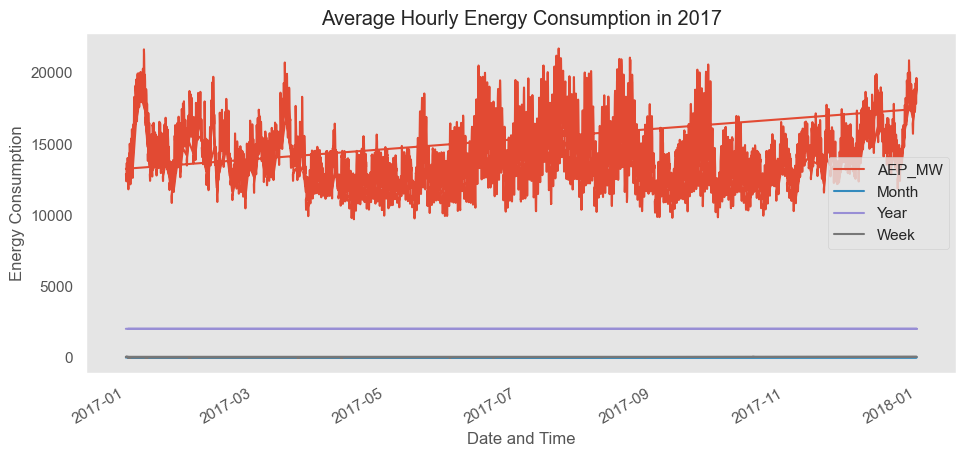

<Figure size 1800x800 with 0 Axes>

In [36]:
# Now filter the data for the year 2017 and plot
df.loc[df.index.year == 2017].plot(figsize=(10, 5), title='Average Hourly Energy Consumption in 2017')

# Add labels and show the plot
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption')
plt.grid()
plt.show()
plt.savefig(r'E:\BDA-03\research work\plot4 energy distribution.png')

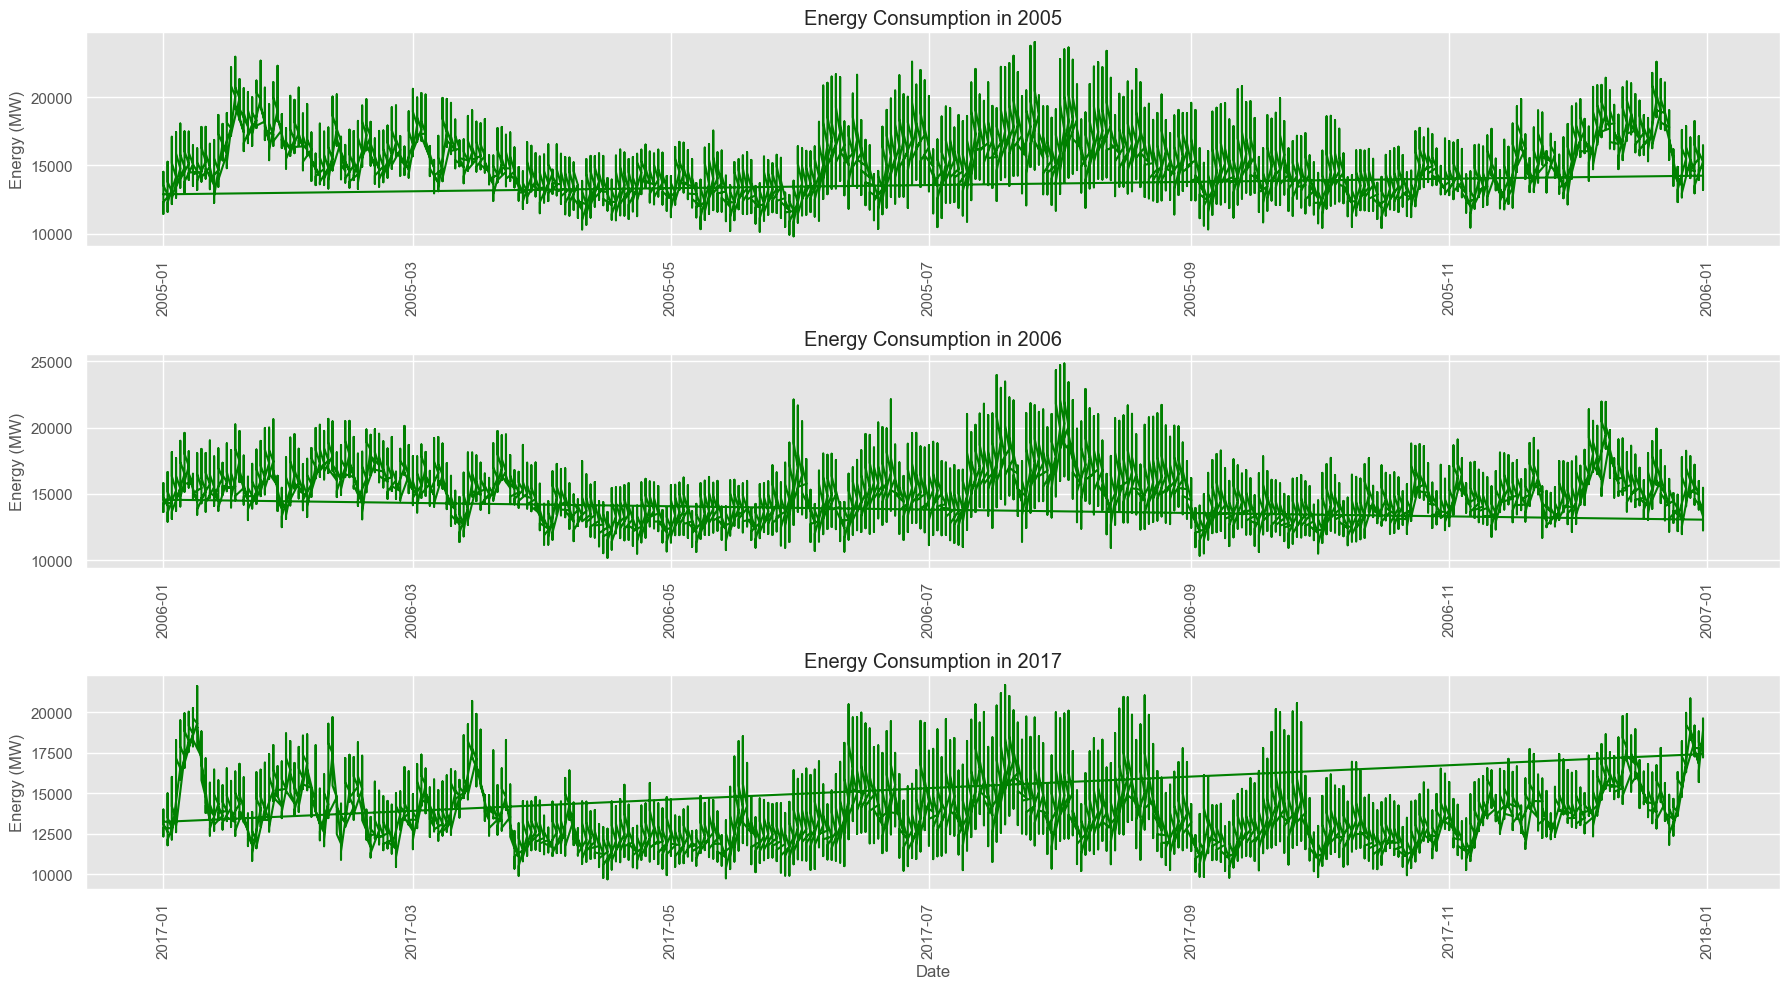

In [37]:
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd


style.use('ggplot')

dataset['Date'] = pd.to_datetime(dataset['Date'])
years = [2005, 2006, 2017]  # Add more years as needed

fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(18, 10))

# Plot data for each year in a loop
for i, year in enumerate(years):
    # Filter data for the specific year
    y_values = dataset[dataset['Date'].dt.year == year]["AEP_MW"].to_list()
    x_values = dataset[dataset['Date'].dt.year == year]["Date"].to_list()
    
    axes[i].plot(x_values, y_values, color="green", linewidth=1.5, label=str(year))
    
    axes[i].set_title(f'Energy Consumption in {year}')
    axes[i].set_ylabel("Energy (MW)")
    
    for label in axes[i].xaxis.get_ticklabels():
        label.set_rotation(90)

plt.xlabel("Date")

plt.tight_layout()
plt.savefig(r'E:\BDA-03\research work\plot5 energy distribution yearly.png')
# Display the plot
plt.show()


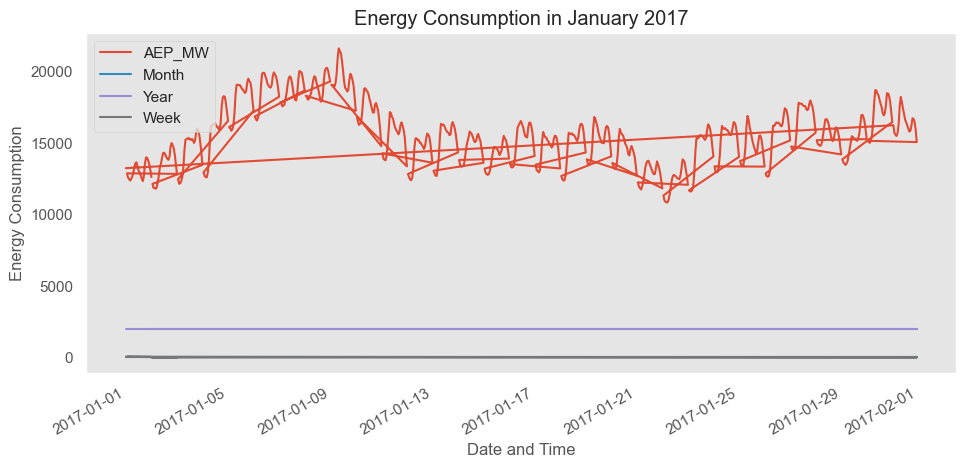

In [38]:
# Filter and plot data for January 2017
df.loc[(df.index.year == 2017) & (df.index.month == 1)].plot(
    figsize=(10, 5), title='Energy Consumption in January 2017'
)
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption')
plt.grid()
plt.show()


In [39]:
print(dataset.dtypes)


AEP_MW           float64
Month              int32
Year               int32
Date      datetime64[ns]
Time              object
Week              UInt32
Day               object
dtype: object


In [40]:
from datetime import datetime

# Assuming 'Time' column contains time objects in the format 'HH:MM:SS'
dataset["Time_in_seconds"] = dataset["Time"].apply(lambda x: (datetime.combine(datetime.today(), x) - datetime.combine(datetime.today(), datetime.min.time())).total_seconds())


In [41]:
dataset["Time_in_minutes"] = dataset["Time_in_seconds"] / 60

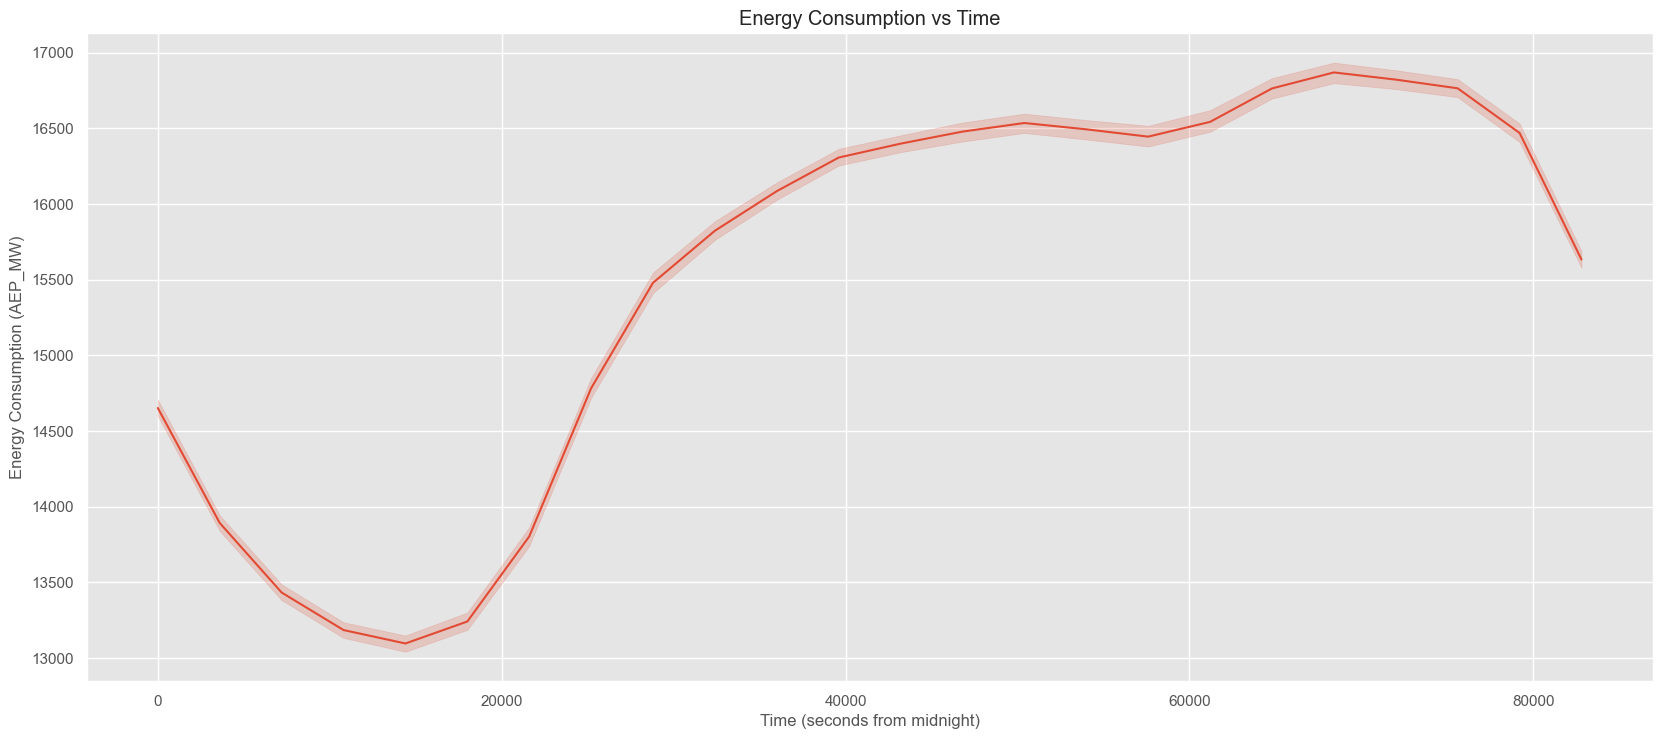

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plotting time in seconds or minutes
sns.lineplot(x=dataset["Time_in_seconds"], y=dataset["AEP_MW"], data=dataset)
plt.title("Energy Consumption vs Time")
plt.xlabel("Time (seconds from midnight)")
plt.ylabel("Energy Consumption (AEP_MW)")
plt.savefig(r'E:\BDA-03\research work\plot6 energy vs time.png')


plt.show()


In [43]:
# Use only numeric columns for the mean operation
NewDataSet = dataset.select_dtypes(include=['number']).resample('D').mean()


In [44]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )


Old Dataset  (121273, 9)
New  Dataset  (5055, 6)


In [45]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [46]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 6)


In [47]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler


In [48]:
#Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [49]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [50]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

pip install tensorflow

In [51]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [52]:
import numpy as np

print(type(X_Train))           # Should be <class 'numpy.ndarray'>
print(X_Train.shape)           # Should be (samples, time_steps, features)

<class 'numpy.ndarray'>
(4935, 60, 1)


In [53]:
# Reshape the data to 3D
X_Train = X_Train.reshape((X_Train.shape[0], X_Train.shape[1], 1))  # Ensure this matches your time steps

In [54]:
#X_Train = np.array(X_Train).reshape((X_Train.shape[0], X_Train.shape[1], 1))
#X_Train = np.array(X_Train, dtype=np.float32)


In [55]:
if np.any(np.isnan(X_Train)):
    print("Input data contains NaN values.")
if np.any(np.isinf(X_Train)):
    print("Input data contains Inf values.")

pip install --upgrade tensorflow keras

In [56]:
import numpy as np  

# Assuming X_Train is your data, and is currently a 2D array  
# Example: If you have (num_samples, num_features)  
num_samples = X_Train.shape[0]  
num_features = X_Train.shape[1]  

# Reshape the data  
# Here, we assume that you want to use each feature as one time step  
# You can also set time_steps to the number of previous time steps you want to consider for forecasting.  
X_Train = X_Train.reshape((X_Train.shape[0], X_Train.shape[1], 1))

In [57]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

2.17.0


In [58]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\Nakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [60]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0372
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0187
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0172
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0171
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0162
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0150
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0152
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0135
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0118
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0106
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0097
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0087
Epoch 13/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0089
Epoch 14/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0078
Epoch 15/50
155/155 ━━━━━━━━━━━━━━━━━━━━

In [61]:
TestData.head(2)

,AEP_MW,Month,Year,Week,Time_in_seconds,Time_in_minutes
Datetime,,,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0,41400.0,690.0
2018-04-27,12964.000000,4.0,2018.0,17.0,41400.0,690.0


In [62]:
#TestData.shapeNewDataSet.shape

In [63]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [64]:
Df_Total.shape

(5155, 1)

In [65]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [66]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\Nakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step


In [67]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [68]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [69]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13581.339844
1,2018-04-27,12964.000000,13076.422852
2,2018-04-28,12237.583333,14918.961914
3,2018-04-29,12156.791667,13592.738281
4,2018-04-30,13443.500000,13179.198242
...,...,...,...
95,2018-07-30,15368.083333,15573.170898
96,2018-07-31,15180.291667,15852.295898
97,2018-08-01,15151.166667,15369.125000
98,2018-08-02,15687.666667,15413.526367


In [70]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

C:\Users\Nakul\AppData\Local\Temp\ipykernel_7784\280961163.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


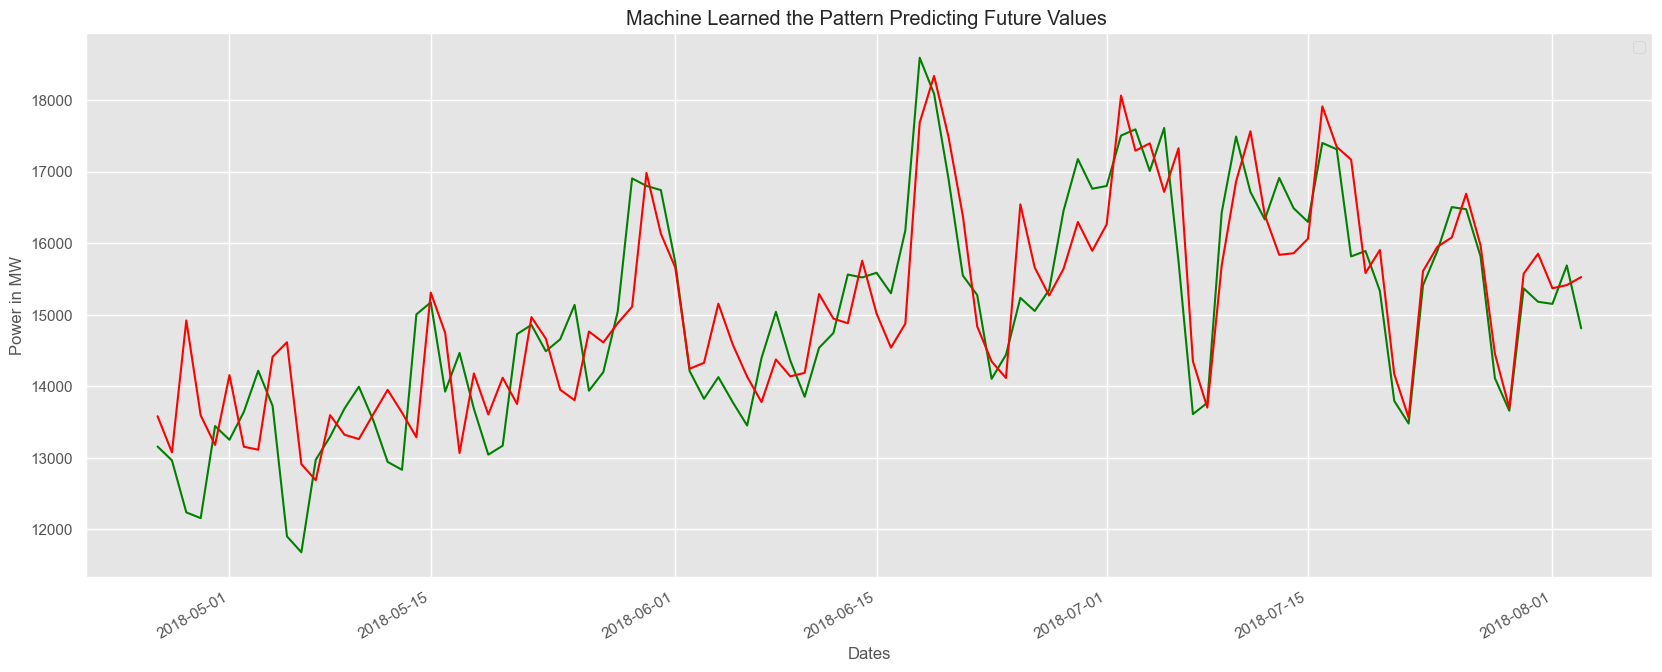

In [71]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.savefig(r'E:\BDA-03\research work\final forecast.png')
plt.legend()

In [72]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(True_MegaWatt, Predicted_MegaWatt))
print(f'RMSE: {rmse}')


RMSE: 801.8408969143026


# Xgb

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [74]:
df = pd.read_csv(r"E:\BDA-03\research work\energy_consumption_prediction-master\data\AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [75]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [76]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


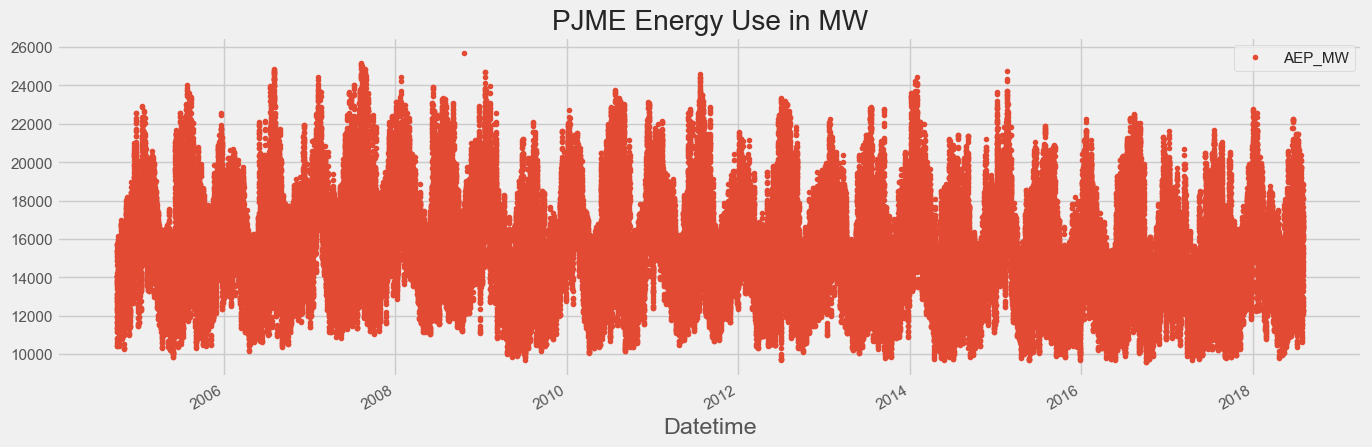

In [77]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

# Train / Test Split


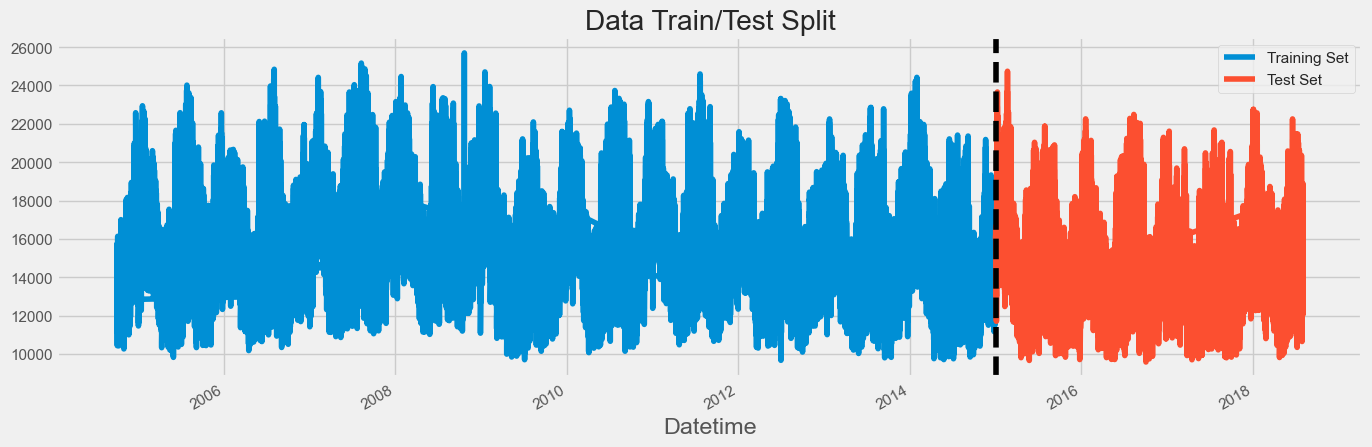

In [78]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Feature Creation

In [79]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)
df.head()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53


# Visualize our Feature / Target Relationship


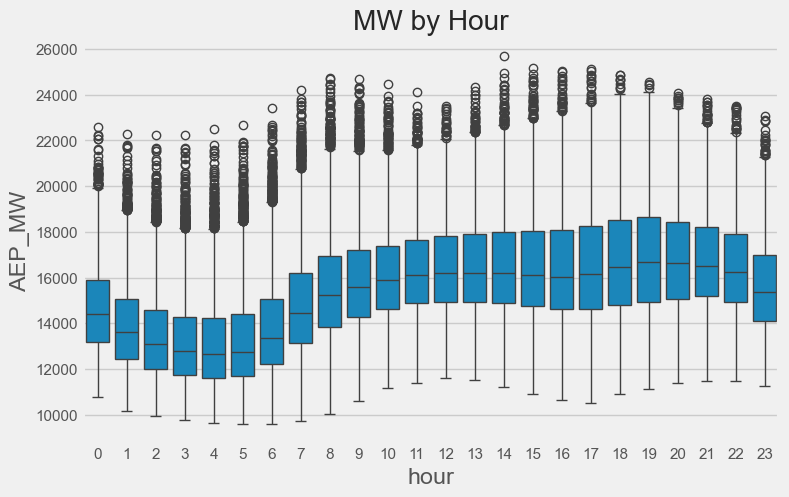

In [80]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='hour', y='AEP_MW')
ax.set_title('MW by Hour')
plt.show()

C:\Users\Nakul\AppData\Local\Temp\ipykernel_7784\403862687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='AEP_MW', palette='Blues')


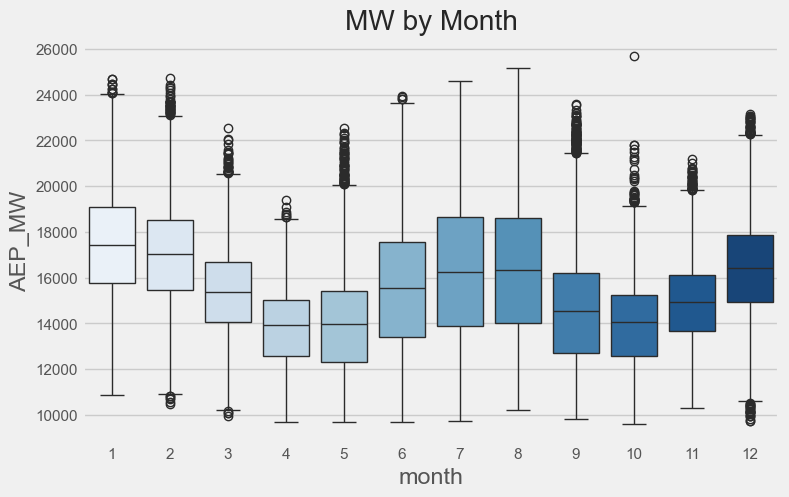

In [81]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='month', y='AEP_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

# Create our Model


In [82]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AEP_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [83]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:15793.26088	validation_1-rmse:14861.30012


C:\Users\Nakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:02:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6033.92025	validation_1-rmse:5144.77002
[200]	validation_0-rmse:2703.71020	validation_1-rmse:2159.54200
[300]	validation_0-rmse:1754.92809	validation_1-rmse:1667.43143
[394]	validation_0-rmse:1524.39761	validation_1-rmse:1657.87305


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [84]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:15793.26088	validation_1-rmse:14861.30012


C:\Users\Nakul\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:02:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6033.92025	validation_1-rmse:5144.77002
[200]	validation_0-rmse:2703.71020	validation_1-rmse:2159.54200
[300]	validation_0-rmse:1754.92809	validation_1-rmse:1667.43143
[393]	validation_0-rmse:1525.95027	validation_1-rmse:1657.89627


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

# Feature Importance

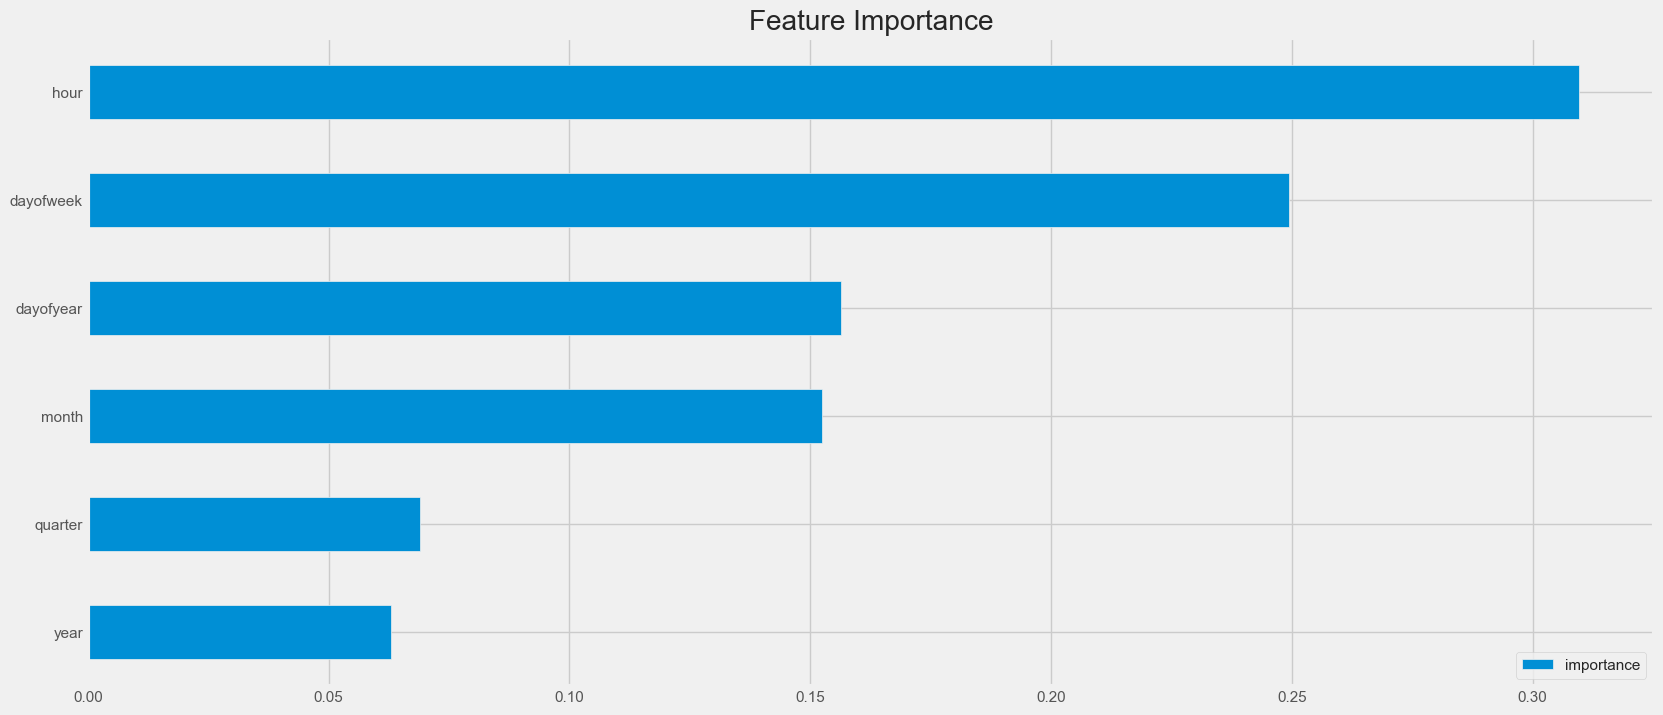

In [85]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Forecast on Test

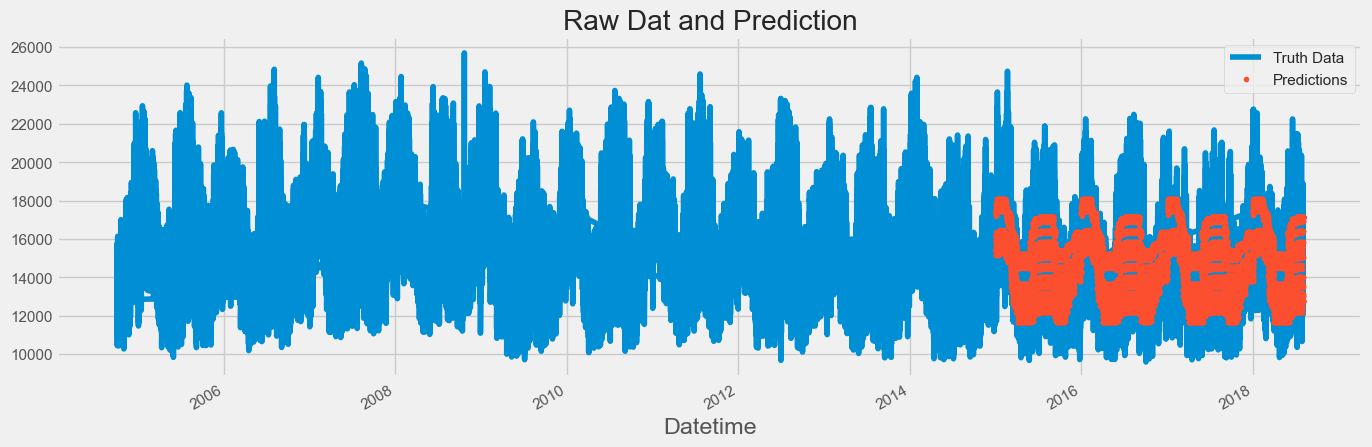

In [86]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

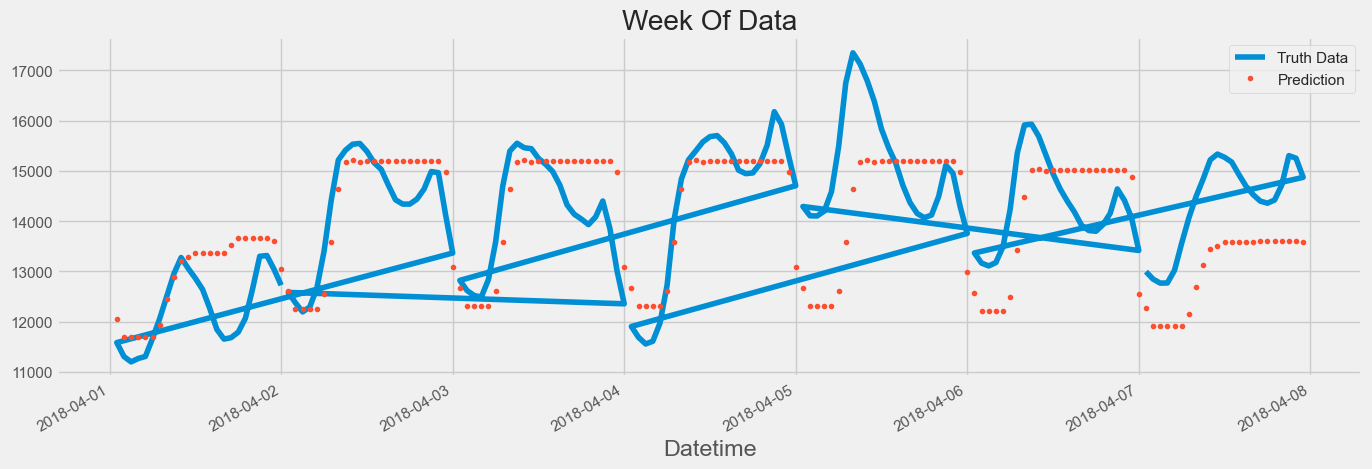

In [87]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

# Score (RMSE)

In [88]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1649.42


# Calculate Error
## Look at the worst and best predicted days

In [89]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2015-02-19    5630.352132
2015-02-20    5394.673665
2018-01-06    4823.354574
2015-01-08    4703.830404
2015-12-25    4415.192912
2015-02-16    4411.147461
2015-12-24    4138.202759
2015-02-15    4079.741536
2018-01-05    4044.314657
2018-01-07    4037.638062
Name: error, dtype: float64

# Next Steps
## More robust cross validation
## Add more features (weather forecast, holidays)